In [127]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [128]:
#訓練データ、テストデータの読み込み
path ="./"
df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

In [129]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [130]:
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

ここからEDAを行う

In [132]:
df.isnull().sum()

PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

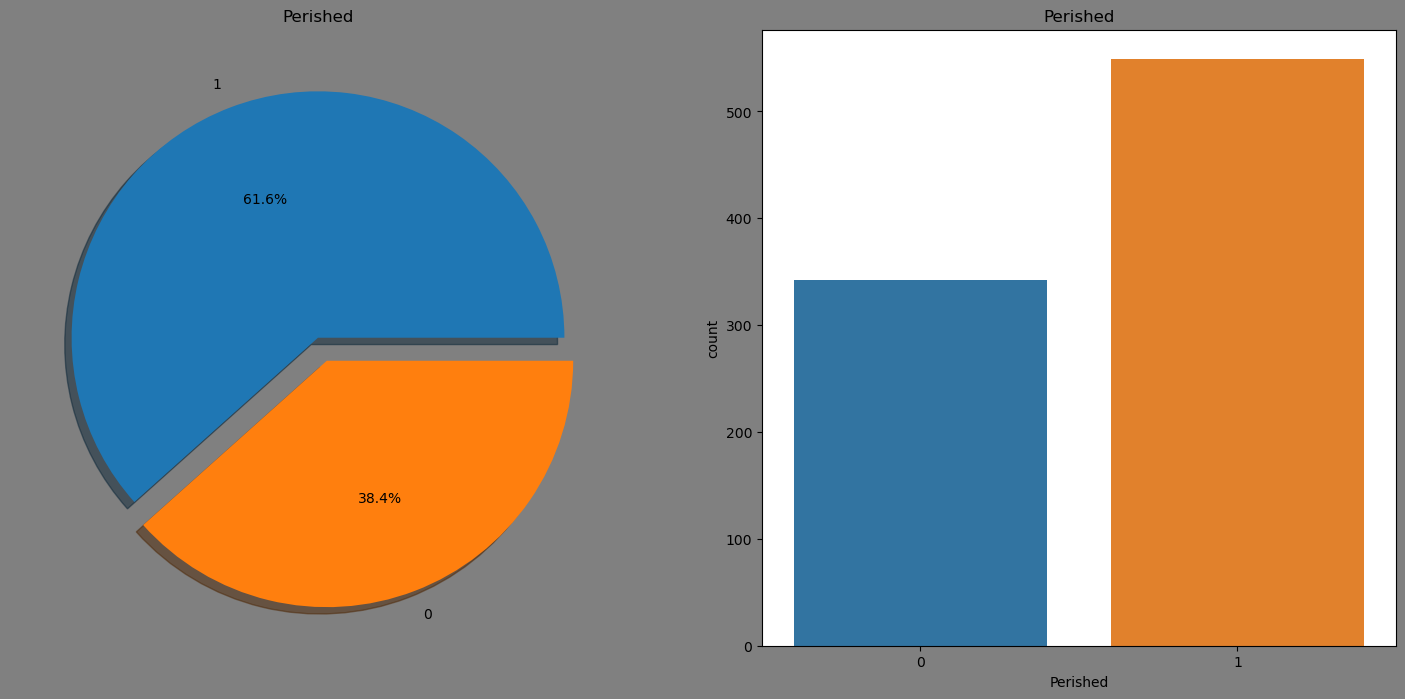

In [134]:
f,ax = plt.subplots(1,2,figsize=(18,8),facecolor='gray')
df['Perished'].value_counts().plot.pie(explode=[0,0.1],autopct='%.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Perished')
ax[0].set_ylabel('')
sns.countplot(x='Perished',data=df,ax=ax[1])
ax[1].set_title('Perished')
plt.show()


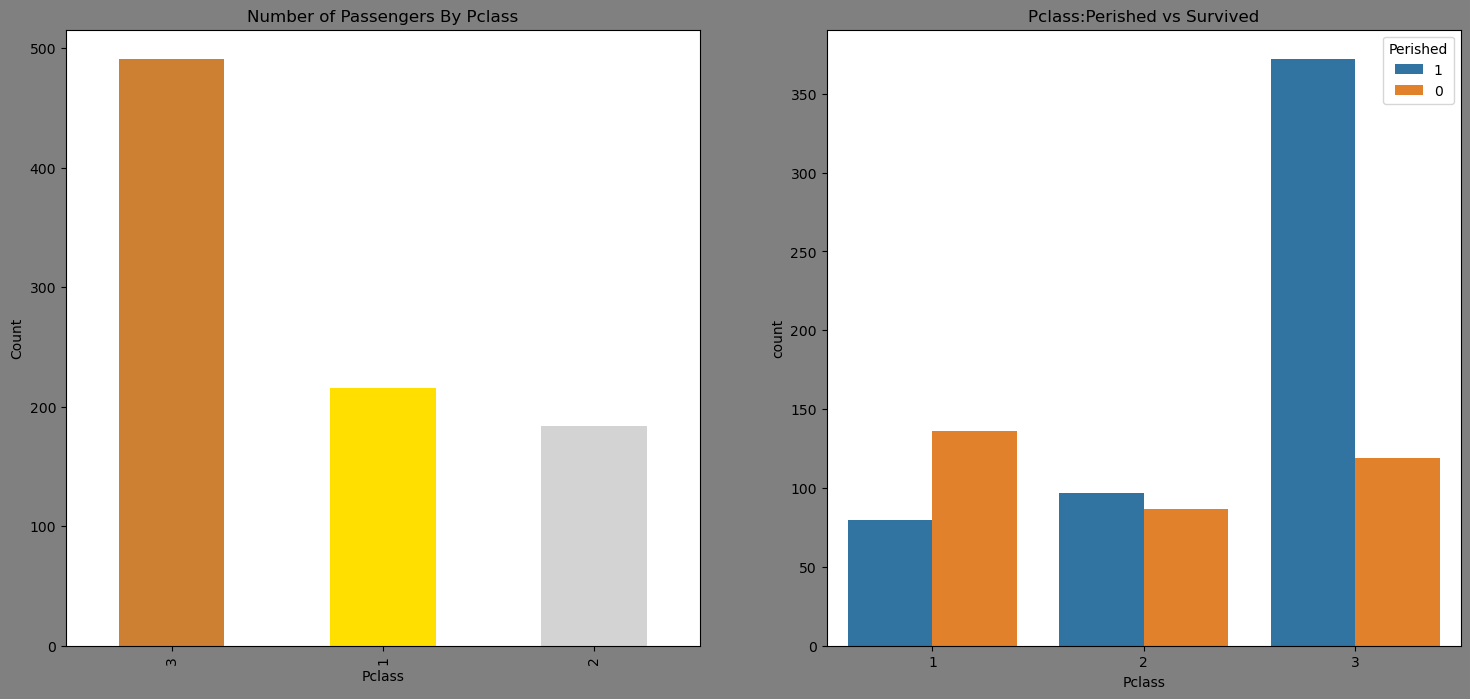

In [135]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df_sub=df
df_sub['Perished'] = df['Perished'].astype(str)
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Perished',data=df_sub,ax=ax[1])
ax[1].set_title('Pclass:Perished vs Survived')
plt.show()

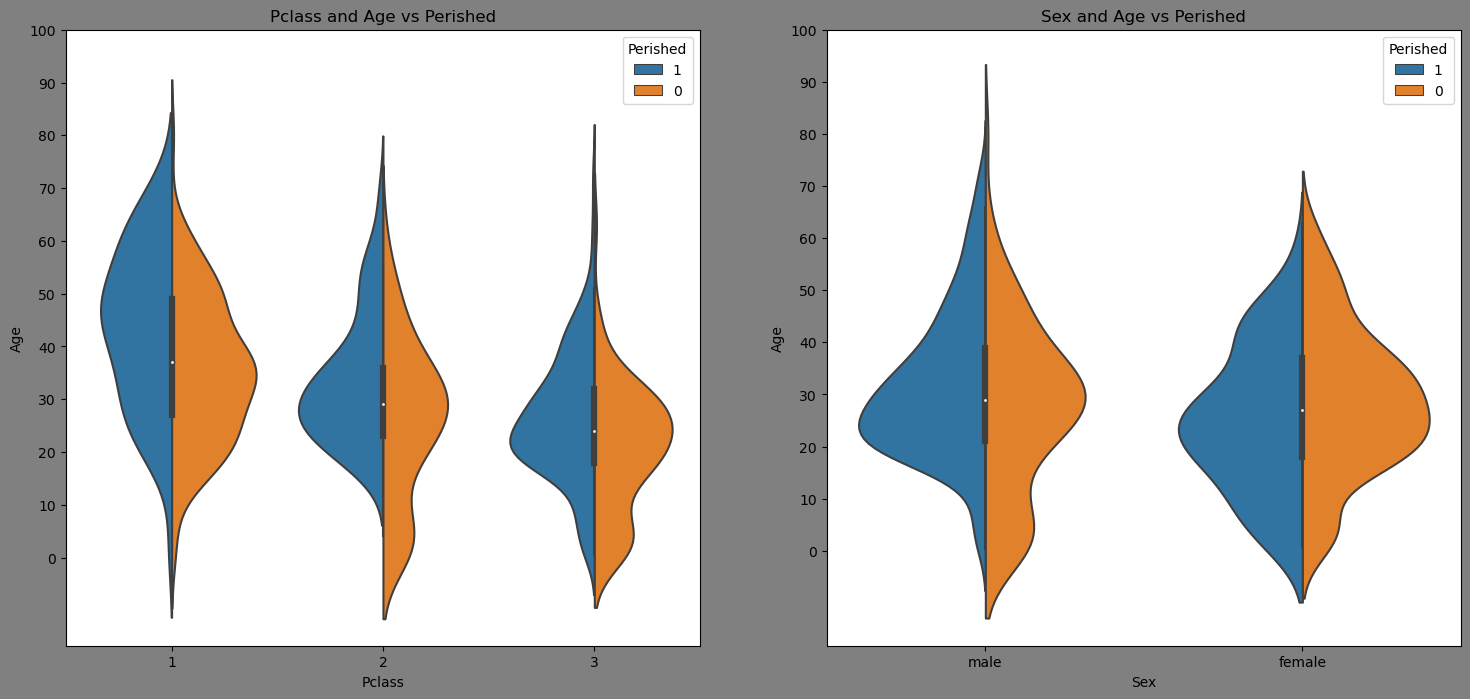

In [136]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
sns.violinplot(x="Pclass",y="Age", hue="Perished", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Perished')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Perished", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Perished')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [137]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.corr())

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000


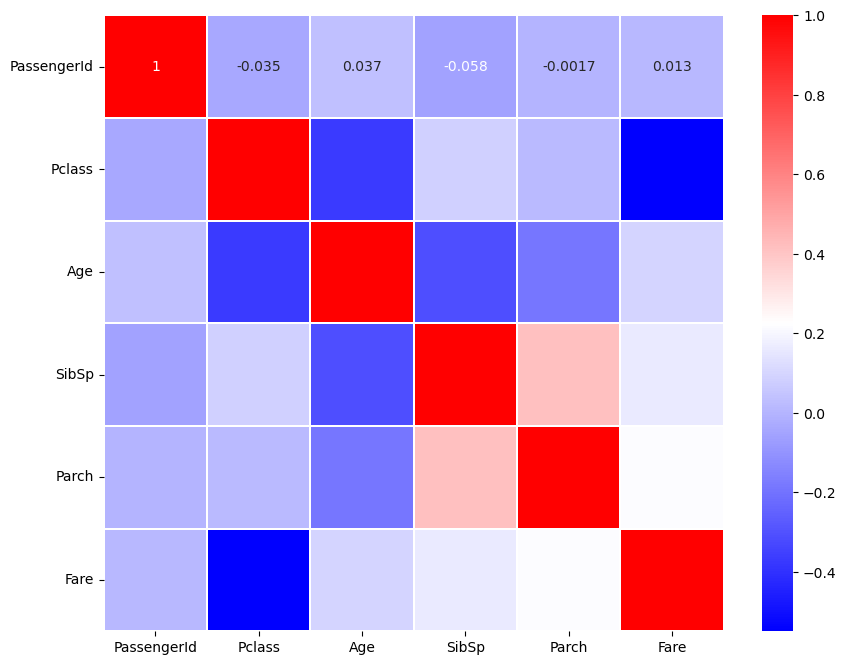

In [138]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

データの前処理を行う

In [139]:
#欠損値の補完
#AgeとFareは平均値で補完
age = pd.concat([df['Age'], df_test['Age']])
fare = pd.concat([df['Fare'], df_test['Fare']])

df['Age'].fillna(age.mean(), inplace=True)
df_test['Age'].fillna(age.mean(), inplace=True)

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

df.isnull().sum()

PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
#Cabinデータを削除
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

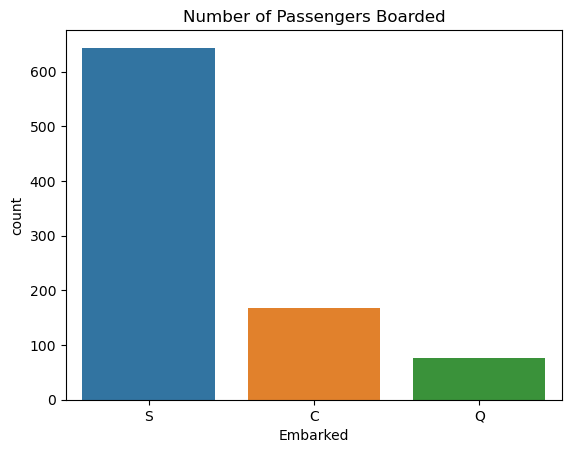

In [141]:
sns.countplot(x='Embarked',data=df)
plt.title('Number of Passengers Boarded')
plt.show()

In [142]:
#Embarkedの欠損値はSで補完
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [143]:
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [144]:
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

df.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,3,0,22.0,1,0,7.2500,S
1,2,0,1,1,38.0,1,0,71.2833,C
2,3,0,3,1,26.0,0,0,7.9250,S
3,4,0,1,1,35.0,1,0,53.1000,S
4,5,1,3,0,35.0,0,0,8.0500,S


In [145]:
#embarkedのデータをone-hot encodingで数値化
embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,1,3,0,22.0,1,0,7.2500,False,False,True
1,2,0,1,1,38.0,1,0,71.2833,True,False,False
2,3,0,3,1,26.0,0,0,7.9250,False,False,True
3,4,0,1,1,35.0,1,0,53.1000,False,False,True
4,5,1,3,0,35.0,0,0,8.0500,False,False,True


以下ランダムフォレストによるベースモデルの構築を行う

In [146]:
X = df.iloc[:, 2:].values #説明変数
y = df.iloc[:, 1].values #目的変数

X_test = df_test.iloc[:, 1:].values

In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:
rfc = RandomForestClassifier(max_depth=19, min_samples_leaf=2, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, min_samples_leaf=2, n_jobs=-1,
                       random_state=42)

In [167]:
print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.9
 Test Score: 0.81


In [150]:
#gridsearchでハイパーパラメータを最適化する
param_grid = {'max_depth': list(np.arange(1,21,1)),
              'min_samples_leaf': list(np.arange(1,21,1))}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,n_estimators=100,n_jobs=-1,random_state=42)
        rfc_grid.fit(X_train, y_train)
        print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
                                                           round(rfc_grid.score(X_valid, y_valid), 3)))

max_depth: 1, min_samples_leaf: 1
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 2
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 3
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 4
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 5
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 6
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 7
    Train Score: 0.782, Test Score: 0.757
max_depth: 1, min_samples_leaf: 8
    Train Score: 0.78, Test Score: 0.757
max_depth: 1, min_samples_leaf: 9
    Train Score: 0.78, Test Score: 0.757
max_depth: 1, min_samples_leaf: 10
    Train Score: 0.78, Test Score: 0.757
max_depth: 1, min_samples_leaf: 11
    Train Score: 0.78, Test Score: 0.757
max_depth: 1, min_samples_leaf: 12
    Train Score: 0.78, Test Score: 0.757
max_depth: 1, min_samples_leaf: 13
    Train Score: 0.78, Test Score: 0.757
max_depth: 1, 

In [151]:
#クロスバリデーションを行う
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 19, 'min_samples_leaf': 2}
CV Score: 0.836


特徴量エンジニアリングを行う

In [152]:
df_fe = df.copy()
df_fe_test = df_test.copy()

df_fe['Family'] = df['SibSp'] + df['Parch']
df_fe_test['Family'] = df_test['SibSp'] + df_test['Parch']

df_fe.head(10)

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family
0,1,1,3,0,22.000000,1,0,7.2500,False,False,True,1
1,2,0,1,1,38.000000,1,0,71.2833,True,False,False,1
2,3,0,3,1,26.000000,0,0,7.9250,False,False,True,0
3,4,0,1,1,35.000000,1,0,53.1000,False,False,True,1
4,5,1,3,0,35.000000,0,0,8.0500,False,False,True,0
5,6,1,3,0,29.881138,0,0,8.4583,False,True,False,0
6,7,1,1,0,54.000000,0,0,51.8625,False,False,True,0
7,8,1,3,0,2.000000,3,1,21.0750,False,False,True,4
8,9,0,3,1,27.000000,0,2,11.1333,False,False,True,2
9,10,0,2,1,14.000000,1,0,30.0708,True,False,False,1


In [153]:
X_fe = df_fe.iloc[:, 2:].values
y_fe = df_fe.iloc[:, 1].values

X_fe_test = df_fe_test.iloc[:, 1:].values

X_fe_train, X_fe_valid, y_fe_train, y_fe_valid = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)

rfc_fe = RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rfc_fe.fit(X_fe_train, y_fe_train)

print('Train Score: {}'.format(round(rfc_fe.score(X_fe_train, y_fe_train), 3)))
print(' Test Score: {}'.format(round(rfc_fe.score(X_fe_valid, y_fe_valid), 3)))

Train Score: 0.905
 Test Score: 0.806


その他モデルの構築を行う

In [154]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))

Logistic Regression 

Train Score: 0.798
 Test Score: 0.81


In [155]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
mlpc.fit(X_train, y_train)

print('Multilayer Perceptron \n')
print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))

Multilayer Perceptron 

Train Score: 0.823
 Test Score: 0.799


In [156]:
print(y_train.shape)

(623,)


In [193]:
def my_model(X):
    rfc_train= rfc.predict_proba(X)
    lr_train = lr.predict_proba(X)
    mlpc_train = mlpc.predict_proba(X)

    proba = (rfc_train + lr_train + mlpc_train) / 3
    threshold = 0.51
    pred = np.zeros(proba.shape[0])
    for i in range(proba.shape[0]):
        if proba[i][1] >= threshold:
            pred[i] = 1

    pred = pred.astype(np.int16)
    return pred



In [190]:
def show_score(pred, y):
    if pred.shape != y.shape:
        raise ValueError("The shapes of two arrays must be the same")
    
    score = np.sum(pred == y.astype(np.int16))/pred.shape[0]
    return score

In [194]:
train_pred = my_model(X_train)
valid_pred = my_model(X_valid)
train_score = round(show_score(train_pred,y_train),3)
valid_score = round(show_score(valid_pred,y_valid),3)
print('Train Score: {}'.format(train_score))
print(' Valid Score: {}'.format(valid_score))

Train Score: 0.864
 Valid Score: 0.817


In [184]:
pred = my_model(X_test)

In [185]:
submission = pd.read_csv(path + 'gender_submission.csv')
submission['Perished'] = pred
submission

,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [186]:
submission.to_csv(path + 'submission.csv', index=False)